In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Data preparation

In [2]:
xlsx = pd.ExcelFile('Go.com_Assignment_Data_-.xlsx')

In [45]:
# load 15q1 data
q1_15 = pd.read_excel(xlsx, 'Sales Data', header = 4, index_col = 'Date')
q1_15 = q1_15[['Revenue','Product Line']]
q1_15['Month'] = q1_15.index.strftime("%b")
q1_15

,Revenue,Product Line,Month
Date,,,
2015-01-01,108632.40,Cars.go.com,Jan
2015-01-01,31494.01,Planes.go.com,Jan
2015-01-01,239376.48,Boats.go.com,Jan
2015-01-02,552064.80,Cars.go.com,Jan
2015-01-02,238344.12,Planes.go.com,Jan
...,...,...,...
2015-03-30,116064.90,Planes.go.com,Mar
2015-03-30,9071.04,Boats.go.com,Mar
2015-03-31,66280.80,Cars.go.com,Mar


In [4]:
# get revenue of each product line for each month
revenue = q1_15.groupby(['Product Line', 'Month']).sum()
revenue

Revenue
Product Line  Month             
Boats.go.com  Feb     1001405.76
              Jan     2006117.28
              Mar     1728824.64
Cars.go.com   Feb     5329144.80
              Jan     5056747.20
              Mar     6371632.80
Planes.go.com Feb    10804349.43
              Jan    13022362.71
              Mar     8703030.42

In [5]:
# load historical data
hist_data = pd.read_excel(xlsx, 'Historical Data', header = 5, index_col = 1)
hist_data = hist_data.iloc[:,1:6]
hist_data = hist_data.transpose()

In [6]:
# subset historical data into profit and revenue
hist_profit = hist_data.iloc[:,8:12]
hist_revenue = hist_data.iloc[:,1:5]
hist_profit

,Cars.go.com,Planes.go.com,Boats.go.com,Total
Q4 2013,1217012.6,161697.015,86591.56,1465301.175
Q1 2014,1132716.4,174307.620,88361.76,1395385.780
Q2 2014,1140398.8,180197.820,93143.68,1413740.300
Q3 2014,1138382.0,172111.210,91955.30,1402448.510
Q4 2014,1181270.4,226688.210,108744.28,1516702.890


In [7]:
hist_revenue

,Cars.go.com,Planes.go.com,Boats.go.com,Total
Q4 2013,6085063.0,32339403.0,4329578.0,42754044.0
Q1 2014,5663582.0,34861524.0,4418088.0,44943194.0
Q2 2014,5701994.0,36039564.0,4657184.0,46398742.0
Q3 2014,5691910.0,34422242.0,4597765.0,44711917.0
Q4 2014,5906352.0,45337642.0,5437214.0,56681208.0


### Profit Projection for 1q15

In [8]:
# calculate historical profit margins
profit_margin = (hist_profit/hist_revenue)*100
profit_margin = profit_margin.transpose()
profit_margin['avg_margin'] = profit_margin.mean(axis=1)
profit_margin

,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,avg_margin
Cars.go.com,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
Planes.go.com,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Boats.go.com,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Total,3.427281,3.104777,3.046937,3.136632,2.675848,3.078295


In [26]:
pd.options.display.float_format = '{:.2f}'.format

In [47]:
est_profit = revenue.merge(profit_margin, left_on = 'Product Line', right_index=True)
est_profit = est_profit[['Revenue','avg_margin']]
est_profit['Est_profit'] = est_profit['Revenue']*est_profit['avg_margin']/100
est_profit

Revenue  avg_margin  Est_profit
Product Line  Month                                    
Boats.go.com  Feb    1001405.76        2.00    20028.12
              Jan    2006117.28        2.00    40122.35
              Mar    1728824.64        2.00    34576.49
Cars.go.com   Feb    5329144.80       20.00  1065828.96
              Jan    5056747.20       20.00  1011349.44
              Mar    6371632.80       20.00  1274326.56
Planes.go.com Feb   10804349.43        0.50    54021.75
              Jan   13022362.71        0.50    65111.81
              Mar    8703030.42        0.50    43515.15

In [28]:
# estimate 1q15 profits
Total_profit = est_profit['Est_profit'].sum()
print('The estimated 1q15 profit is ${}.'.format(int(Total_profit)))

The estimated 1q15 profit is $3608880.


### Findings
• **Notice that the profits margin for each product line across the historical data stayed constant**  <br>

• Cars.go.com has the highest profit margin of 20%  <br>
• Planes.go.com has the lowest profit margin of 0.5%  <br>
• Boats.go.com has a profit margin of 2%  <br>
• The overall profit margin is around 3%, which is close to Boats.go.com's profit margin <br>

Text(0.5, 0.98, '1Q15 Revenue Structure')

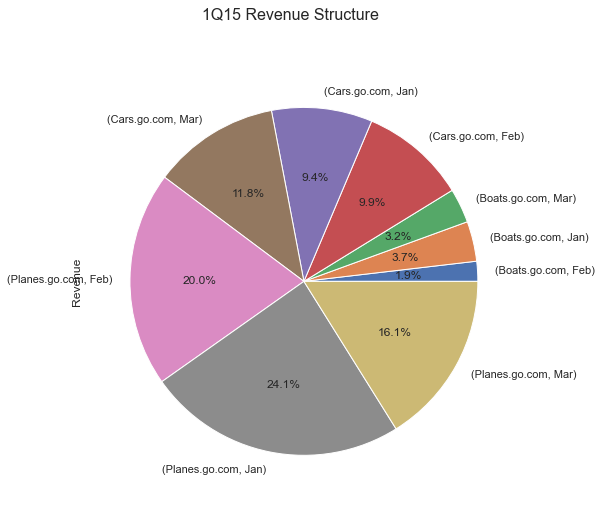

In [29]:
data2 = est_profit.groupby(by=est_profit.index)['Revenue'].sum()
fig2 = plt.figure(figsize=(15,8))
data2.plot.pie(autopct="%.1f%%")
fig2.suptitle('1Q15 Revenue Structure', fontsize=16)

Text(0.5, 0.98, 'Historical Profit Structure')

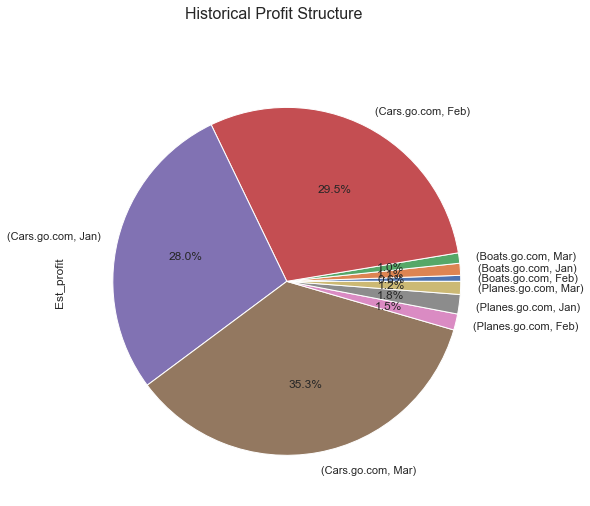

In [30]:
data = est_profit.groupby(by=est_profit.index)['Est_profit'].sum()
fig = plt.figure(figsize=(15,8))
data.plot.pie(autopct="%.1f%%")
fig.suptitle('Historical Profit Structure', fontsize=16)

Text(0.5, 0.98, '1Q15 Revenue Breakdown')

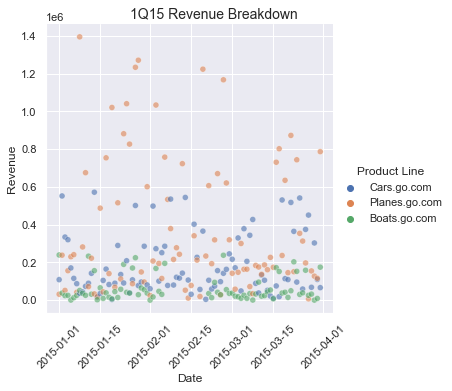

In [32]:
chart = sns.relplot(data= q1_15, x=q1_15.index, y='Revenue', hue='Product Line', alpha=0.6)
chart.set_xticklabels(rotation=45)
chart.fig.suptitle('1Q15 Revenue Breakdown', fontsize=14)

Text(0.5, 1.0, '1Q15 Transaction Volume by Product Line')

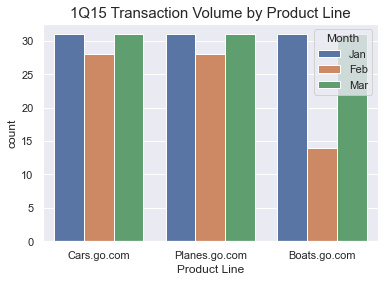

In [33]:
sns.countplot(data= q1_15,x='Product Line', hue='Month').set_title('1Q15 Transaction Volume by Product Line', fontsize=15)
